<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu11/2241720045_TirtaNBP_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# No Absen: 27

# Tugas
- Buatlah model CNN berdasarkan dataset citra LFW.

In [503]:
# Langkah 1 - Import Library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cv2

Langkah pertama dalam kode ini adalah mengimpor berbagai pustaka yang diperlukan untuk membangun dan melatih model pembelajaran mesin. `tensorflow` digunakan untuk membangun dan melatih model deep learning, sementara `matplotlib.pyplot` digunakan untuk memvisualisasikan data atau hasil. `sklearn.model_selection` dan `sklearn.preprocessing` membantu dalam pemrosesan data, seperti membagi dataset menjadi data pelatihan dan pengujian serta mengubah label ke format numerik. Pustaka `numpy` digunakan untuk manipulasi array, dan `cv2` digunakan untuk memproses gambar. Kode ini menyiapkan semua alat yang diperlukan untuk memulai proyek pembelajaran mesin.

Jumlah sampel: 1288
Tinggi gambar: 50
Lebar gambar: 37
Jumlah channel: 1


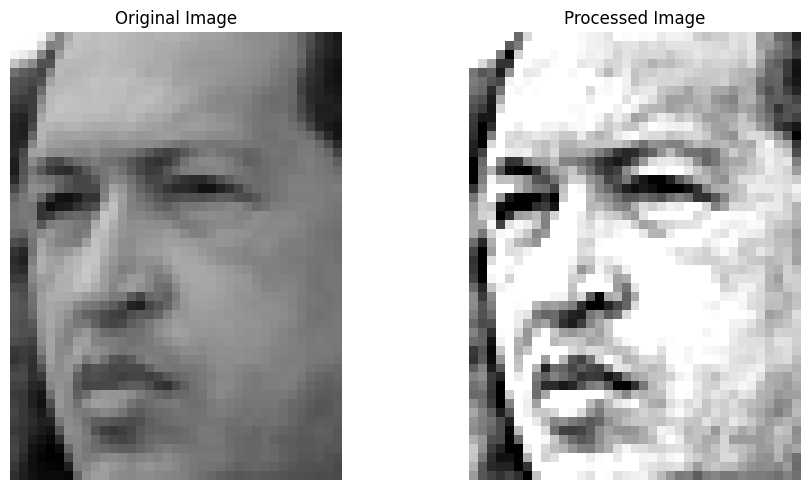

In [504]:
# Langkah 2 - Unduh Dataset LFW dan Terapkan Image Processing
def apply_image_processing_refined(image):
    image = (image * 255).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(4,4))
    enhanced = clahe.apply(image)

    kernel = np.array([[-0.1,-0.1,-0.1],
                       [-0.1, 1.8,-0.1],
                       [-0.1,-0.1,-0.1]])
    sharpened = cv2.filter2D(enhanced, -1, kernel)
    denoised = cv2.GaussianBlur(sharpened, (5,5), 0.3)

    alpha = 1.1
    beta = 5
    final = cv2.convertScaleAbs(denoised, alpha=alpha, beta=beta)
    final = final.astype(np.float32) / 255.0

    return final

X = lfw_people.images
X = np.expand_dims(X, -1)

X_processed = np.zeros_like(X)
for i in range(len(X)):
    X_processed[i, :, :, 0] = apply_image_processing(X[i, :, :, 0])

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

n_samples, h, w, c = X_processed.shape
print(f"Jumlah sampel: {n_samples}")
print(f"Tinggi gambar: {h}")
print(f"Lebar gambar: {w}")
print(f"Jumlah channel: {c}")

import matplotlib.pyplot as plt

def plot_comparison(original, processed, index=0):
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.title('Original Image')
    plt.imshow(original[index, :, :, 0], cmap='gray')
    plt.axis('off')

    plt.subplot(122)
    plt.title('Processed Image')
    plt.imshow(processed[index, :, :, 0], cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

for i in range(1):
    plot_comparison(X, X_processed, i)

Langkah kedua ini melakukan pemrosesan gambar pada dataset LFW untuk meningkatkan kualitas gambar sebelum digunakan dalam pelatihan model. Fungsi `apply_image_processing_refined()` menerapkan beberapa teknik pemrosesan, seperti CLAHE untuk meningkatkan kontras, penyaringan untuk ketajaman, pengurangan noise menggunakan Gaussian Blur, dan penyesuaian pencahayaan. Gambar yang telah diproses kemudian dibagi menjadi data pelatihan dan pengujian, dan label target dienkode dengan `LabelEncoder`. Hasil pemrosesan divisualisasikan untuk membandingkan gambar asli dan gambar yang telah diproses, sementara informasi seperti jumlah sampel, dimensi gambar, dan jumlah channel ditampilkan untuk memastikan data siap digunakan dalam model.

In [505]:
# Langkah 3 - Membangun Model CNN
model = tf.keras.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 37, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),

    layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pada langkah ketiga ini, model Convolutional Neural Network (CNN) dibangun menggunakan TensorFlow dan Keras. Model terdiri dari tiga lapisan konvolusional (`Conv2D`), masing-masing diikuti oleh lapisan pooling maksimum (`MaxPooling2D`) untuk mengurangi dimensi gambar dan mengekstraksi fitur. Setelah lapisan konvolusional, gambar diratakan dengan `Flatten()`, dan dua lapisan Dense ditambahkan: satu lapisan tersembunyi dengan aktivasi ReLU dan satu lapisan output dengan aktivasi softmax untuk klasifikasi multi-kelas. Model ini kemudian dikompilasi menggunakan optimizer Adam, fungsi kehilangan `sparse_categorical_crossentropy`, dan metrik akurasi untuk evaluasi performa. Model ini siap untuk dilatih menggunakan data pelatihan yang telah diproses.

In [506]:
# Langkah 4 - Melatih Model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.3511 - loss: 1.7854 - val_accuracy: 0.4612 - val_loss: 1.6269
Epoch 2/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4134 - loss: 1.6895 - val_accuracy: 0.4612 - val_loss: 1.5976
Epoch 3/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4133 - loss: 1.6407 - val_accuracy: 0.4612 - val_loss: 1.5270
Epoch 4/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4286 - loss: 1.5784 - val_accuracy: 0.5581 - val_loss: 1.3287
Epoch 5/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5282 - loss: 1.3390 - val_accuracy: 0.5194 - val_loss: 1.3696
Epoch 6/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5348 - loss: 1.2703 - val_accuracy: 0.7209 - val_loss: 0.9911
Epoch 7/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6832 - loss: 0.9602 - val_accuracy: 0.7132 - val_loss: 0.8573
Epoch 8/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7293 - loss: 0.7956 - val_accuracy: 0.7558 - val_loss

Pada langkah keempat, model CNN yang telah dibangun dilatih menggunakan dataset pelatihan (`X_train` dan `y_train`) selama 25 epoch dengan ukuran batch 32. Proses pelatihan menghasilkan peningkatan akurasi yang signifikan, dimulai dari sekitar 35% pada epoch pertama dan mencapai lebih dari 96% pada epoch ke-25. Selama pelatihan, model juga dievaluasi pada data pengujian (`X_test` dan `y_test`), dengan akurasi validasi meningkat dari 46% menjadi 87% pada akhir epoch. Selain itu, fungsi kehilangan (loss) model berkurang seiring berjalannya waktu, menunjukkan bahwa model semakin mampu memprediksi kelas dengan baik. Grafik akurasi dan kehilangan dapat digunakan untuk memantau kemajuan pelatihan dan menganalisis performa model.

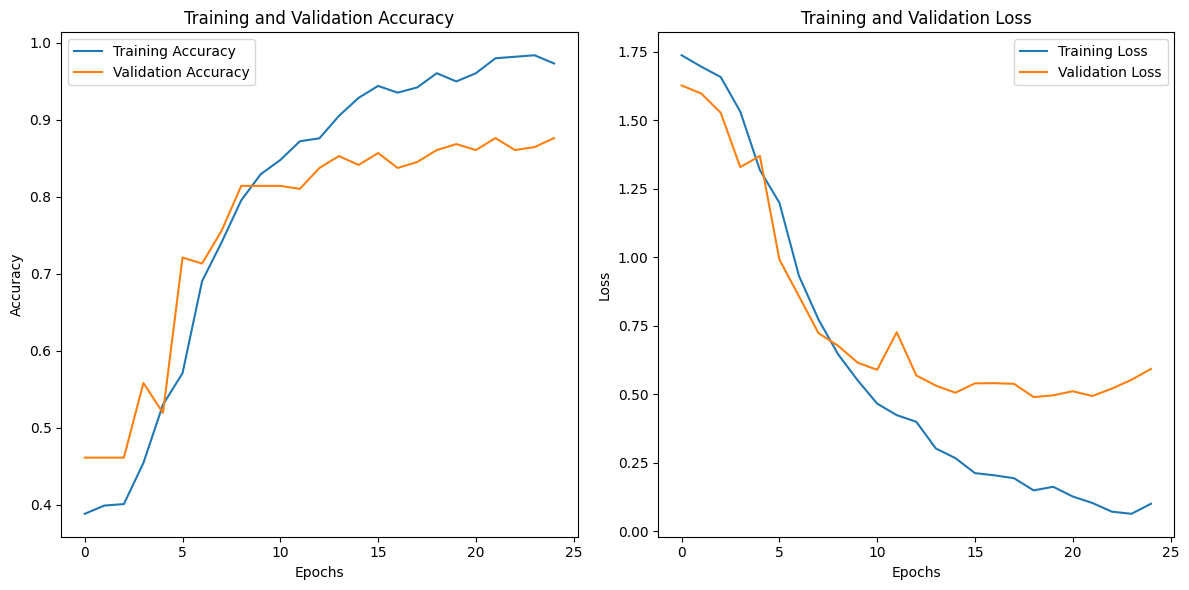

In [507]:
import matplotlib.pyplot as plt

# Membuat grafik untuk accuracy dan loss
plt.figure(figsize=(12, 6))

# Plotting Accuracy dan Loss
for i, metric in enumerate(['accuracy', 'loss']):
    plt.subplot(1, 2, i+1)
    plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

Kode ini menghasilkan grafik yang membandingkan akurasi dan kehilangan (loss) selama pelatihan antara data pelatihan dan data validasi. Dengan menggunakan `matplotlib`, dua subplot dibuat: satu untuk akurasi dan satu untuk kehilangan. Di masing-masing subplot, grafik pelatihan (`accuracy` dan `loss`) dan validasi (`val_accuracy` dan `val_loss`) diplot terhadap jumlah epoch. Ini membantu untuk memvisualisasikan apakah model mengalami overfitting (jika akurasi pelatihan jauh lebih tinggi daripada validasi) atau apakah model belajar dengan baik sepanjang waktu. Fungsi `tight_layout()` memastikan grafik terlihat rapi tanpa tumpang tindih label atau judul.

In [508]:
# Langkah 5 - Mengevaluasi Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8822 - loss: 0.6137 
Test Accuracy: 87.60%


Pada langkah kelima, model dievaluasi menggunakan data pengujian (`X_test` dan `y_test`). Fungsi `evaluate()` mengembalikan dua nilai: *loss* dan *accuracy* pada data pengujian. Berdasarkan hasil evaluasi, model mencapai akurasi pengujian sebesar 87,60%, dengan kehilangan (loss) sebesar 0,6137. Angka ini menunjukkan bahwa model cukup baik dalam mengklasifikasikan data pengujian, meskipun ada kemungkinan ruang untuk perbaikan, terutama terkait dengan pengurangan kehilangan (loss). Evaluasi ini memberikan gambaran umum tentang bagaimana model akan performa ketika diterapkan pada data baru yang belum dilihat sebelumnya.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


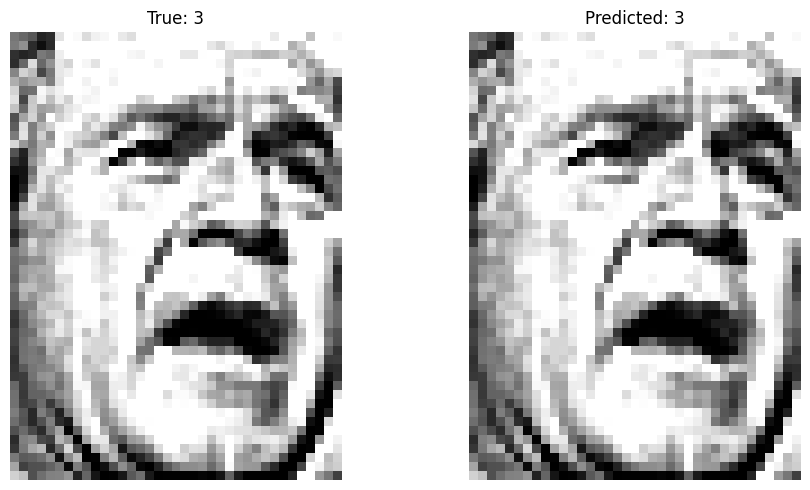

In [509]:
# Langkah 6 - Prediksi Contoh Acak
random_index = np.random.randint(0, len(X_test))
image = X_test[random_index]
true_label = y_test[random_index]

predicted_class = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=1)

true_label_name = encoder.inverse_transform([true_label])[0]
predicted_label_name = encoder.inverse_transform(predicted_class)[0]

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True: {true_label_name}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label_name}")
plt.axis('off')

plt.tight_layout()
plt.show()

Langkah keenam ini melibatkan prediksi terhadap gambar acak dari data pengujian untuk mengevaluasi kinerja model. Sebuah gambar dipilih secara acak dari data pengujian, kemudian model digunakan untuk memprediksi kelas gambar tersebut. Label sebenarnya dan label yang diprediksi oleh model diterjemahkan kembali ke nama kelas menggunakan `LabelEncoder`. Gambar asli dan gambar dengan prediksi ditampilkan berdampingan untuk membandingkan hasil prediksi dengan label sebenarnya, memberikan gambaran visual tentang seberapa baik model melakukan klasifikasi pada contoh acak.